Title: Comparative Analysis of Regression and Classification Models for Predicting Student Academic Performance

Author: Okanlawon Micheal Olatunji

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [6]:
from pathlib import Path

DATA_PATH = Path("..") / "data" / "raw" / "student-mat.csv"
df = pd.read_csv(DATA_PATH, sep=";")

In [7]:
df.shape

(395, 33)

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    str  
 1   sex         395 non-null    str  
 2   age         395 non-null    int64
 3   address     395 non-null    str  
 4   famsize     395 non-null    str  
 5   Pstatus     395 non-null    str  
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    str  
 9   Fjob        395 non-null    str  
 10  reason      395 non-null    str  
 11  guardian    395 non-null    str  
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    str  
 16  famsup      395 non-null    str  
 17  paid        395 non-null    str  
 18  activities  395 non-null    str  
 19  nursery     395 non-null    str  
 20  higher      395 non-null    str  
 21  inte

In [17]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


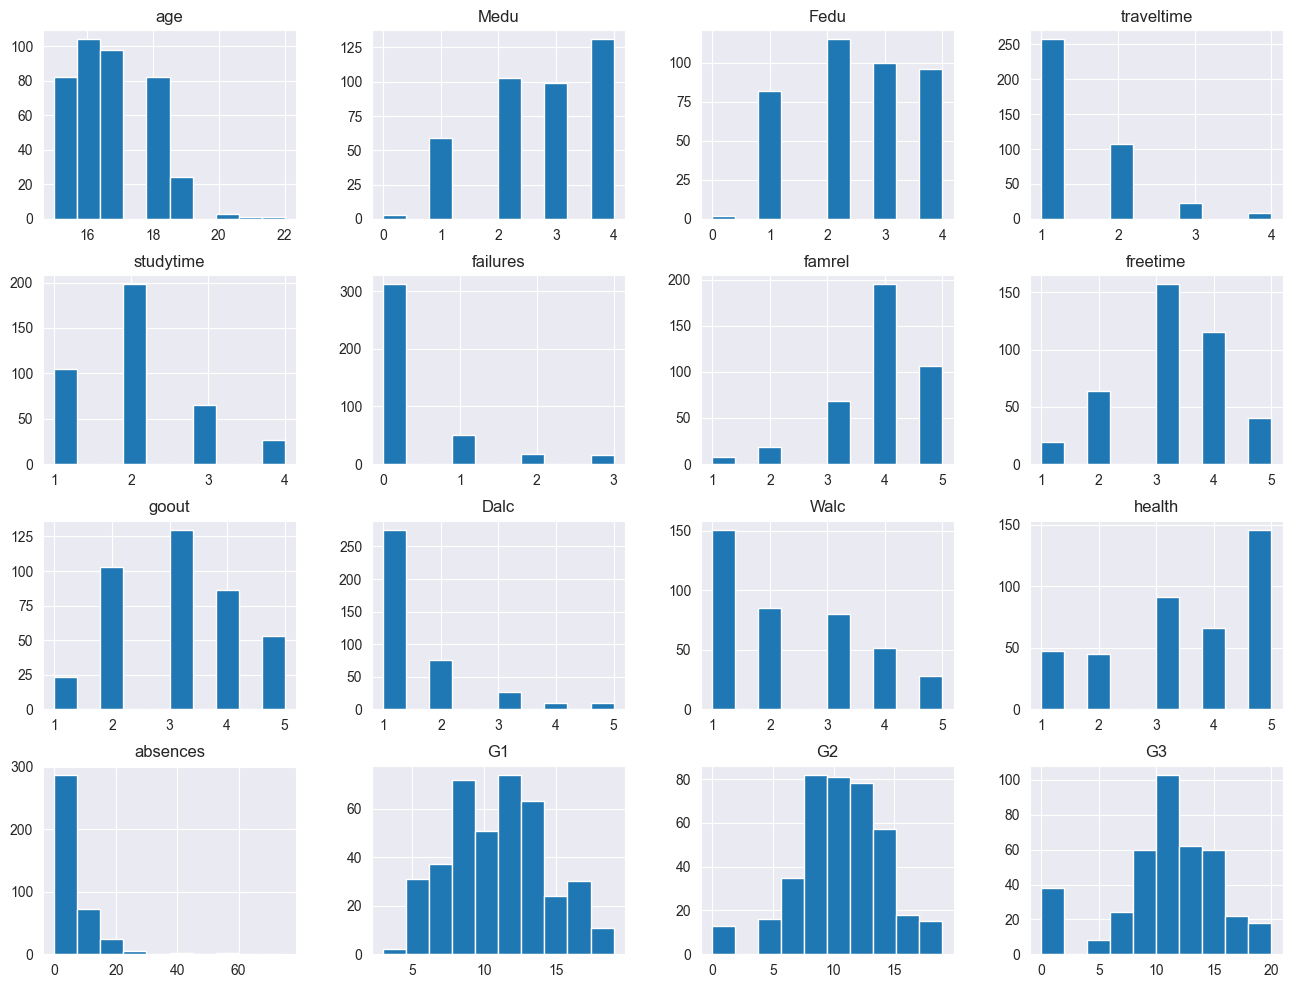

In [18]:
df.hist(figsize=(16, 12))
plt.show()

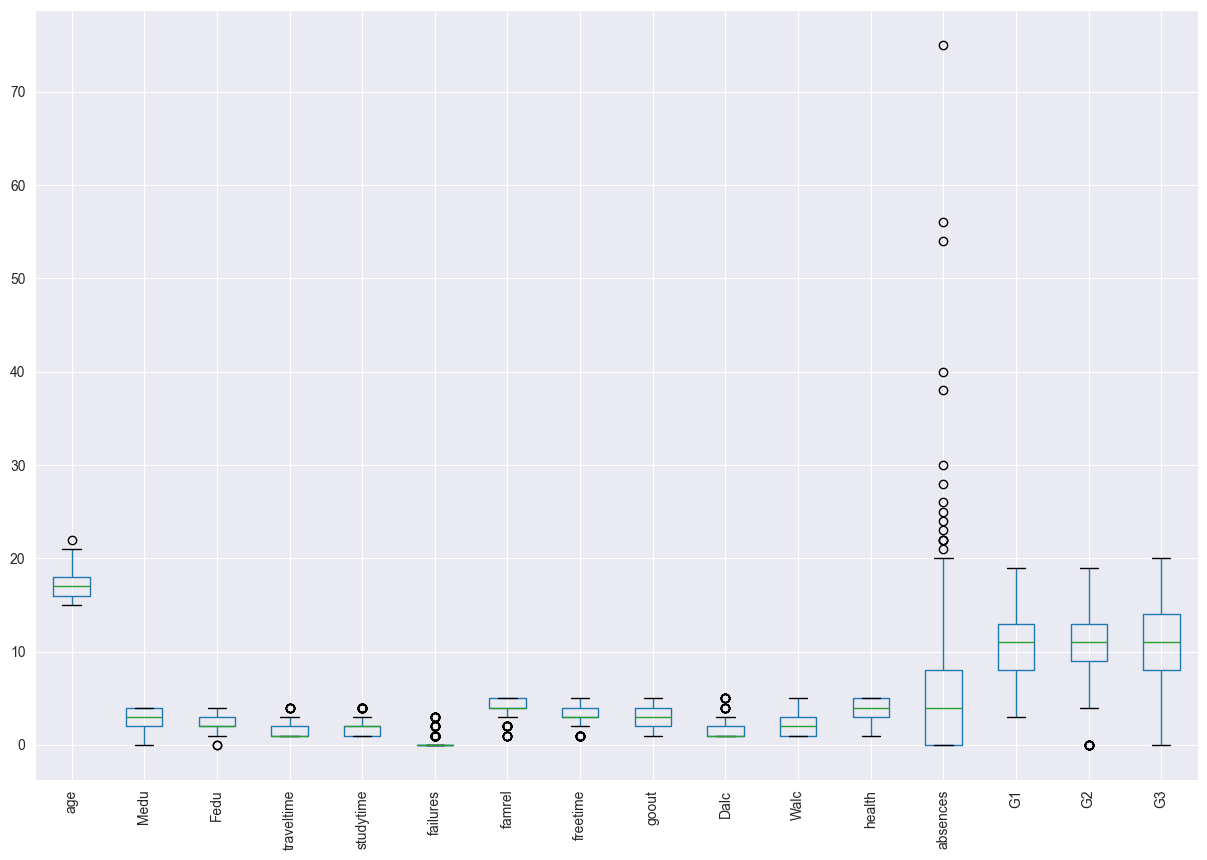

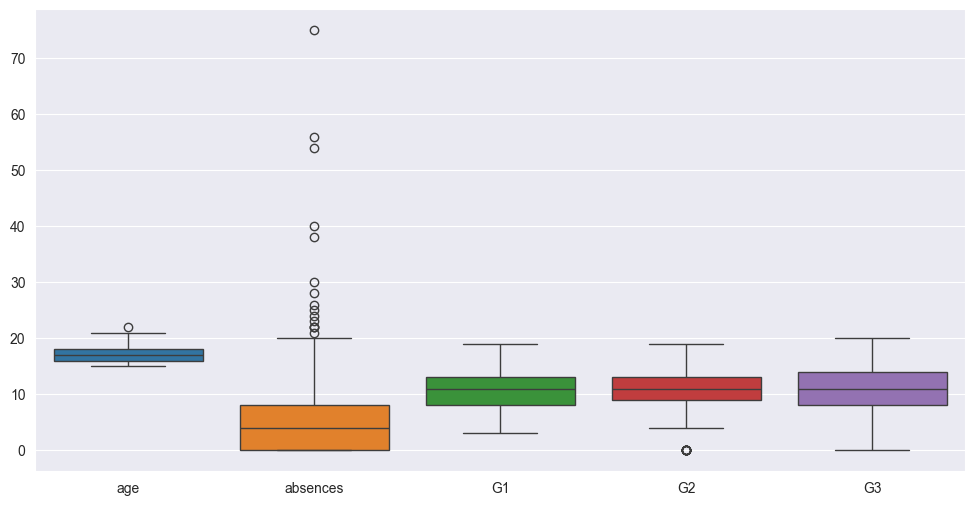

In [20]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'absences', 'G1', 'G2', 'G3']])
plt.show()

In [21]:
numeric_df = df.select_dtypes(include=np.number)

z_scores = np.abs(zscore(numeric_df))

outliers = (z_scores > 3)
print(np.sum(outliers))
plt.figure(figsize=(18, 14))

numeric_df = df.select_dtypes(include='number')


49


<Figure size 1800x1400 with 0 Axes>

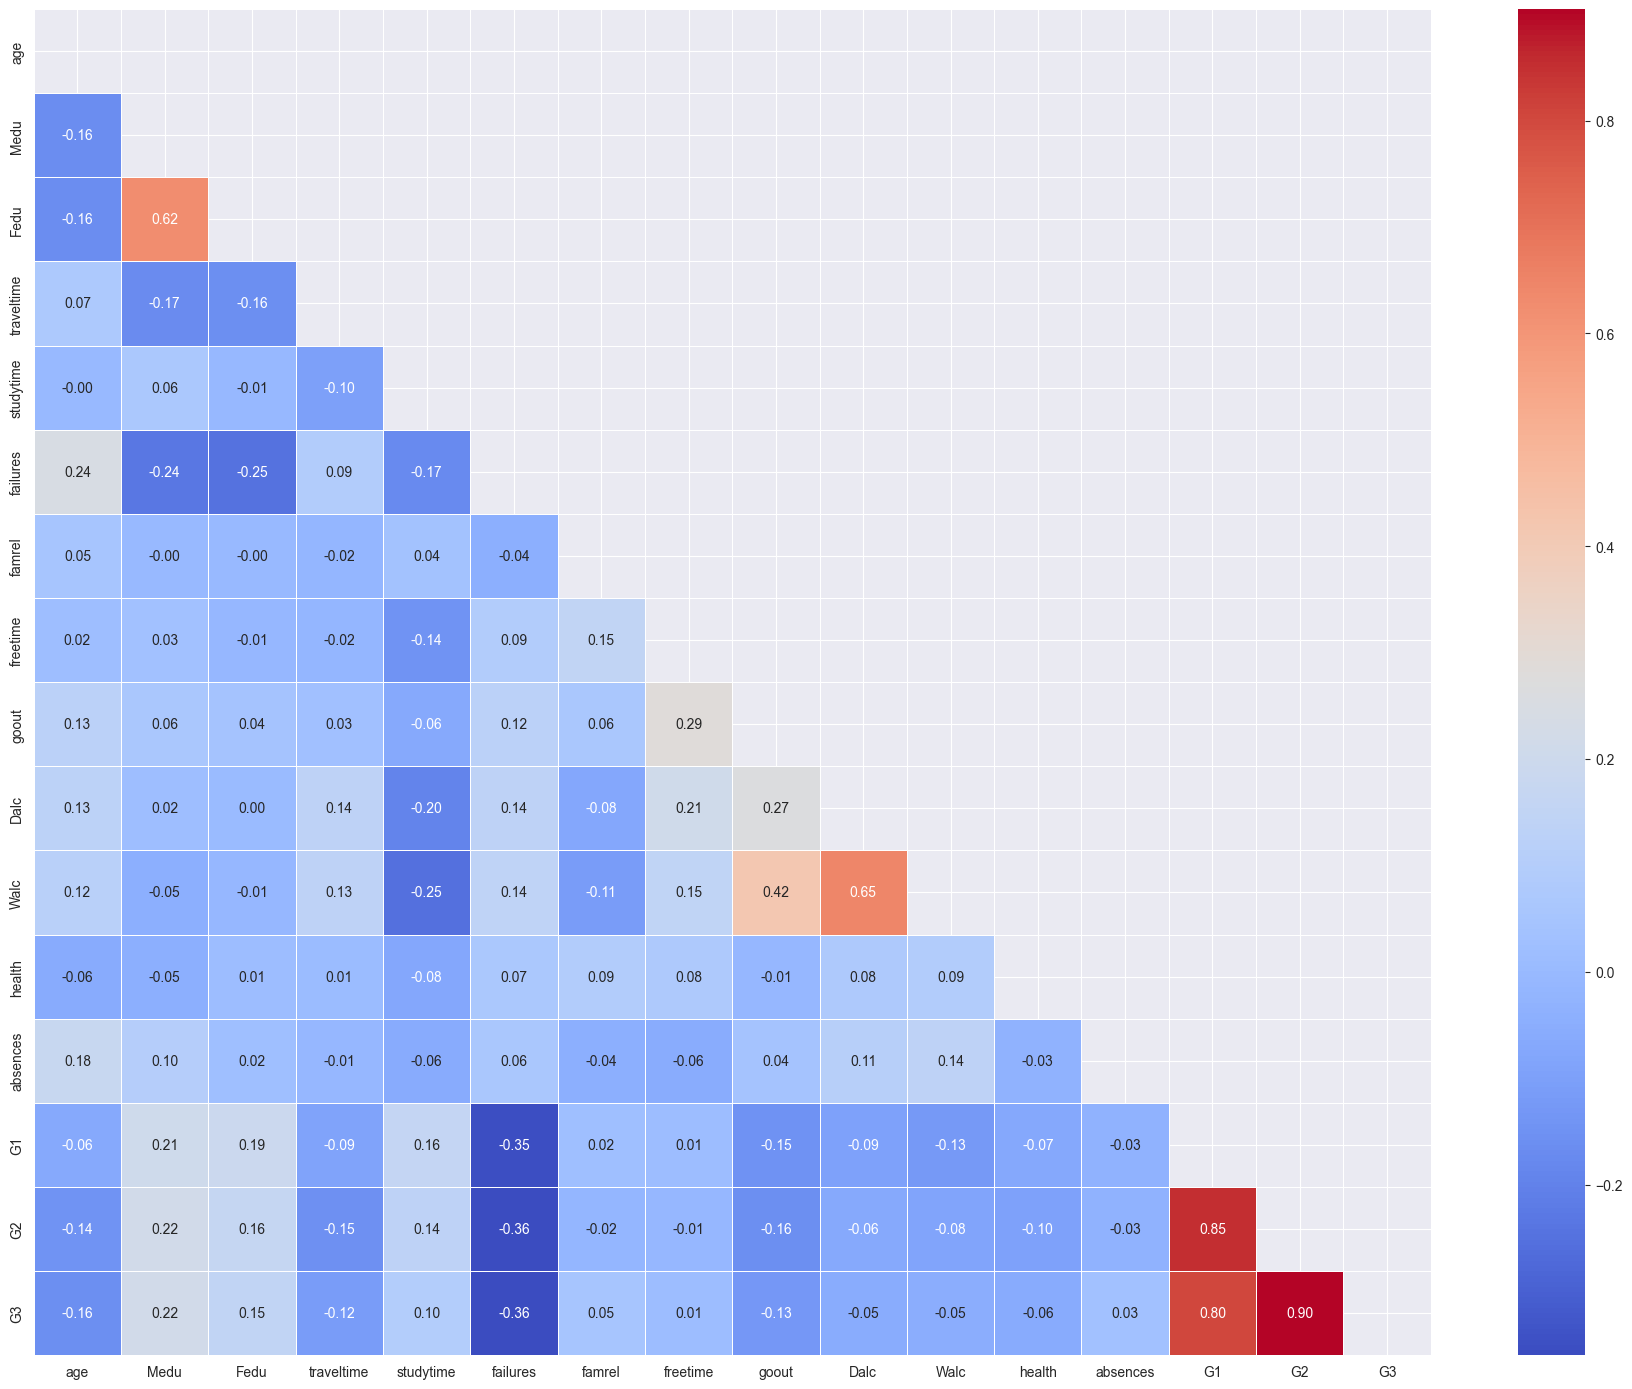

In [23]:
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.tight_layout()
plt.show()


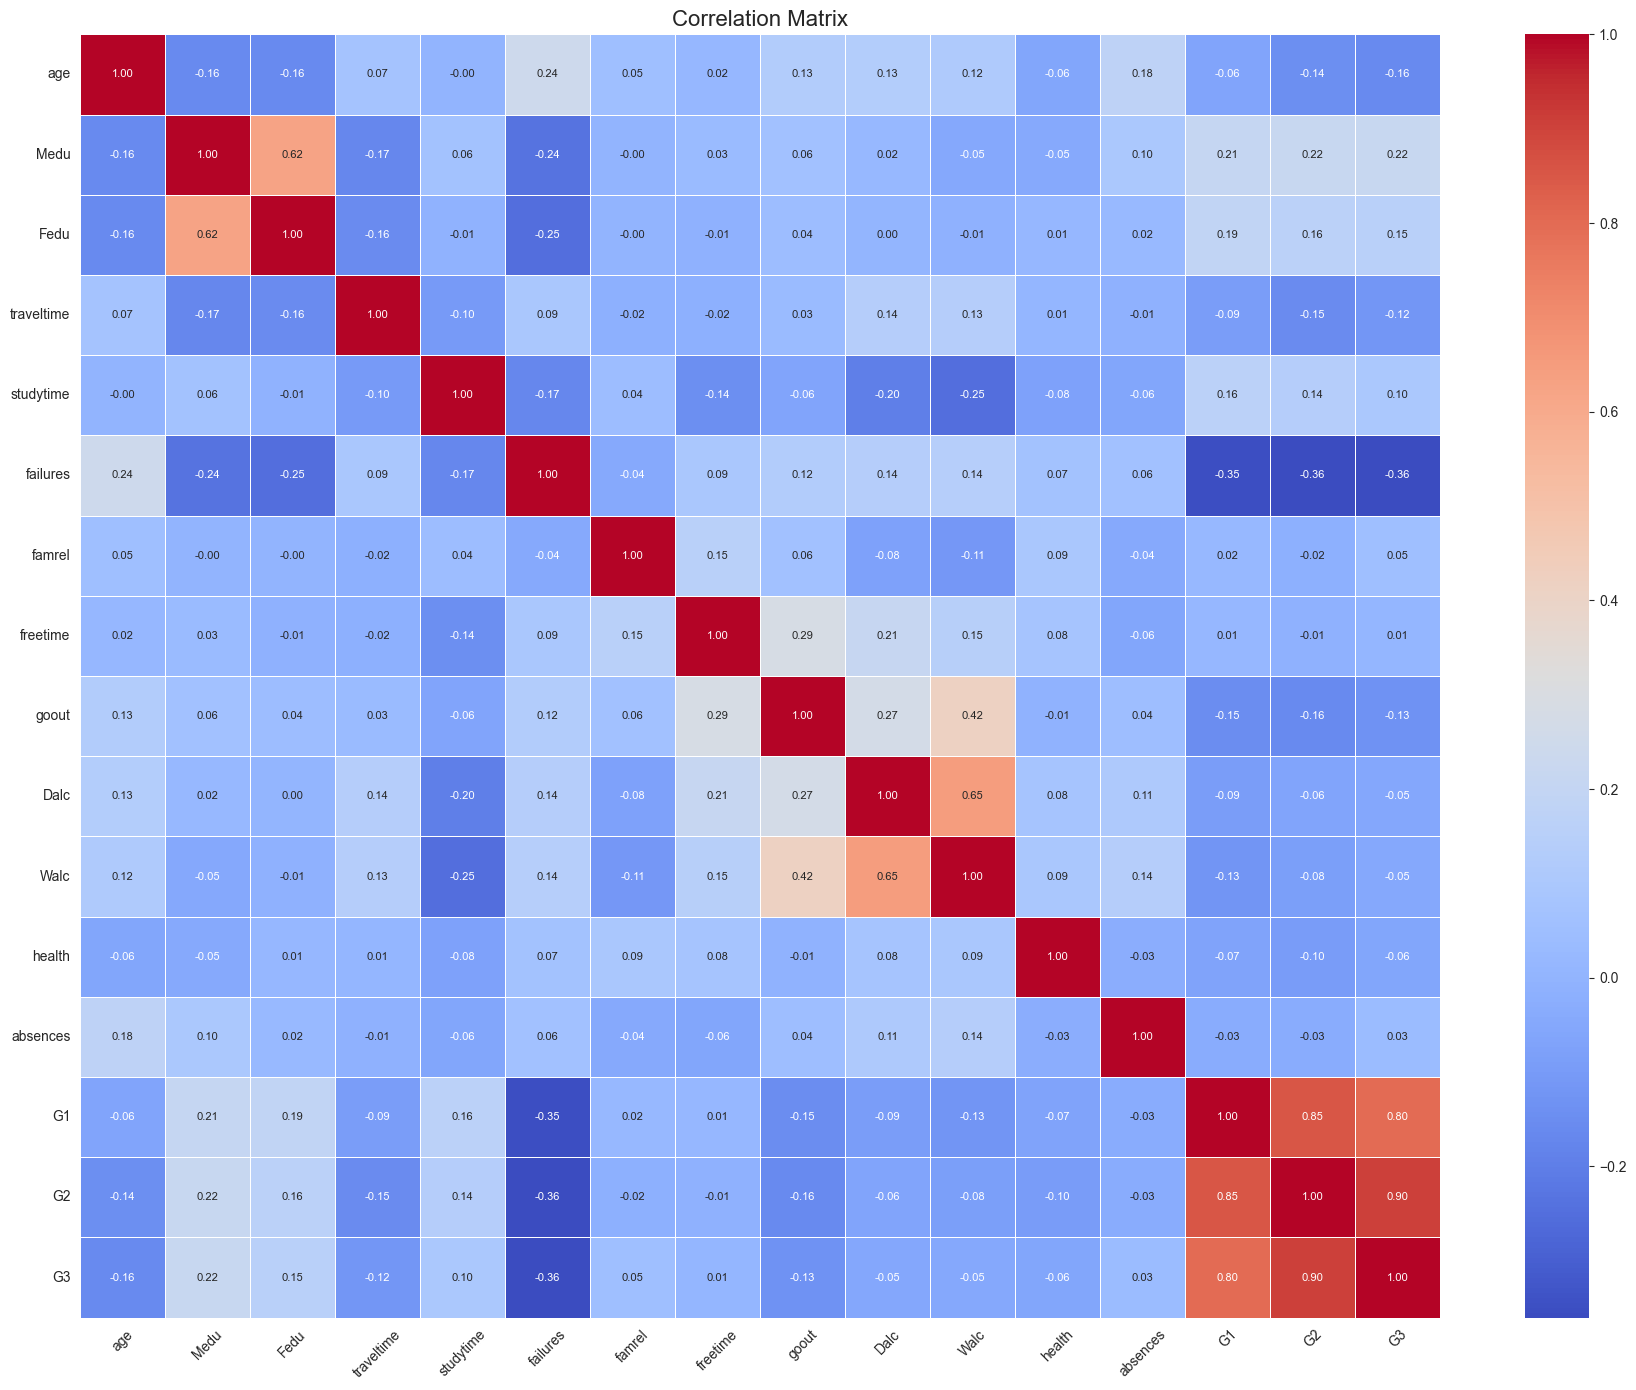

In [24]:
corr["G3"].sort_values(ascending=False)
plt.figure(figsize=(18, 14))

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8}, linewidths=0.5)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

## EDA Summary (Key Findings)

- **Dataset size & structure:** The dataset contains **395 students** with a mix of **demographic**, **family**, **school**, and **behavioral** features, plus the target **final grade (G3)**.
- **Target distribution (G3):** Final grades are spread across the 0–20 scale, with most students clustered around the middle range.
- **Outliers:** Variables like **absences** show noticeable outliers (a small number of students have very high absence counts), which can disproportionately affect some models.
- **Correlation insights:** Several features show meaningful relationships with **G3**, including:
  - **failures** (typically negative relationship),
  - **absences** (often negative),
  - **studytime** (often positive),
  - and other lifestyle-related factors with weaker correlations.
- **Grade leakage awareness:** Prior grades (**G1**, **G2**) are strongly correlated with **G3**; including them can inflate performance. For realism, they were excluded from modeling later.
- **In conclusion:** The data suggests **non-linear** relationships between student characteristics and final performance, motivating the use of **tree-based models** (Random Forest, XGBoost) in addition to linear/logistic baselines.